# matplotlib绘图
写在前边，此notebook写于笔者尝试对matplotlib绘图有更深入的学习了解之时，有些细节可能未必会详尽的展示出来，但笔者尝试站在讲授知识的角度写下此文档，如有不准确或不恰当的地方，还请[指正](mailto:12410615@mail.sustech.edu.cn)

## 一些抽象的理解
matplotlib本质是利用数据的数值，进行一些可视化的绘图展示。在学习这个东西之初，我对数据本身进行了一个抽象化的理解概括，可以认为，数据本质是点，我们会有很多样本，每个样本代表一个对应的数据点，我们有多少样本便有多少点。这些点是分布在高维空间的点，每个维度代表该点的某一特征，我们通过观察该点在这个维度上的数值，可以得知这个数据这个特征的具体数值。我们使用matplotlib绘图，就是在关注许多点不同的维度组合起来产生的可视化特征，如折线图，反应的是点随着某一个维度的变化（如时间），在另一个维度上产生的变化。

## matplotlib语法风格
matplotlib有两种不同的语法风格，一种是*state-based interface*，基于pyplot状态的风格，一种是*object-oriented interface*，面向对象编程的风格，前者由matplotlib的pyplot模块提供，模仿了MATLAB的绘图风格，使用这种语言的时候，我们好像在一直对着一个叫做plt的东西下达命令，如`plt.legend()` `plt.title('title')`，我们为图像添加图例，添加标题。这种语言风格简单易上手，但是不便于进行复杂的图像管理，这里笔者更多的探索后者，面向对象的语言风格，这种语言风格方便进行一些更复杂的绘图控制与管理，也和python语言风格更相似。

## Key Components
先从matplotlib的构建开始，在我们进行绘图之初，我们最先需要的，是一张画布。我们将画布铺开，在其上绘制各种图像，这个画布，就是`plt.figure()`，它会返回一个Figure对象（你需要的画布），你可以在这之上放纵你的想象力。

其次，我们需要关注我们要在画布上绘制什么，一个很好的出发点在于，我们希望绘制更好的，更模块化的图，换言之，我们希望把特征放在很多个子图中去展示，每个子图体现不同的图像特征，这将对应axes对象(子图)。
**Figure**，**Axes**是一种包含关系（物理上的包含），Figure是一个较大的容器，里边盛放了许多Axes，我们在Axes中进行具体的绘图，展示我们希望展示的特征。

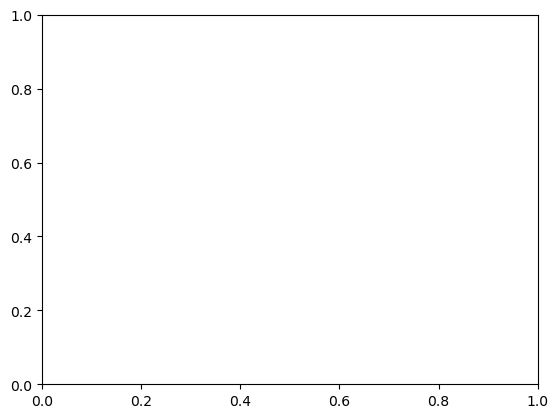

In [2]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
# 创建画布（figure）
fig = plt.figure()
# 添加子图（ax）
ax = fig.add_subplot(111)  # 1行1列的第1个子图
# PS: 关于这里后边三个数字的含义，其实很有门道，稍后会进行讲解。

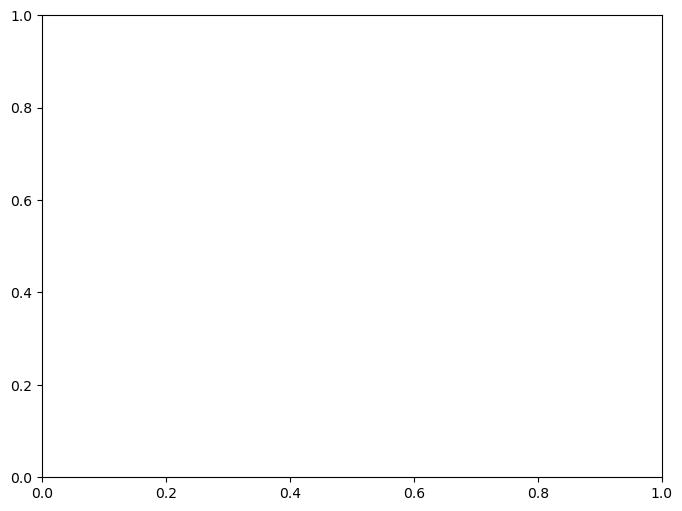

In [23]:
# 我们也可以一步创建fig和ax
fig, ax = plt.subplots(figsize=(8,6))

很好，刚才我们已经接触到了matplotlib创建figure和axe的语法，但这只是初级的入门，因为我们刚才只在figure中创建了一个子图ax，我们并没有创建很多的子图，一个figure中只存储了一个子图。

接下来我们探索一下一个figure中存储多个子图的情况

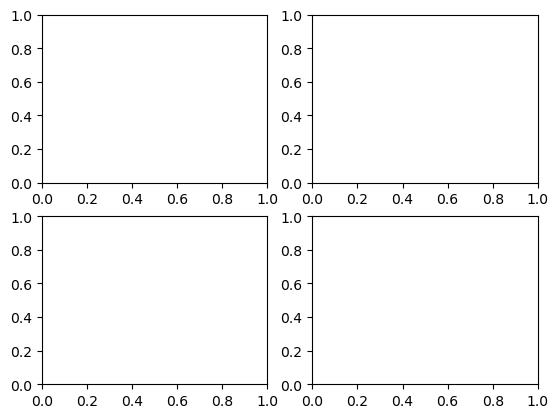

In [ ]:
fig, ax = plt.subplots(2, 2)
# 最简单的 我们可以在最初通过指定两行两列的排版 创建四个子图，然后利用索引访问对应子图

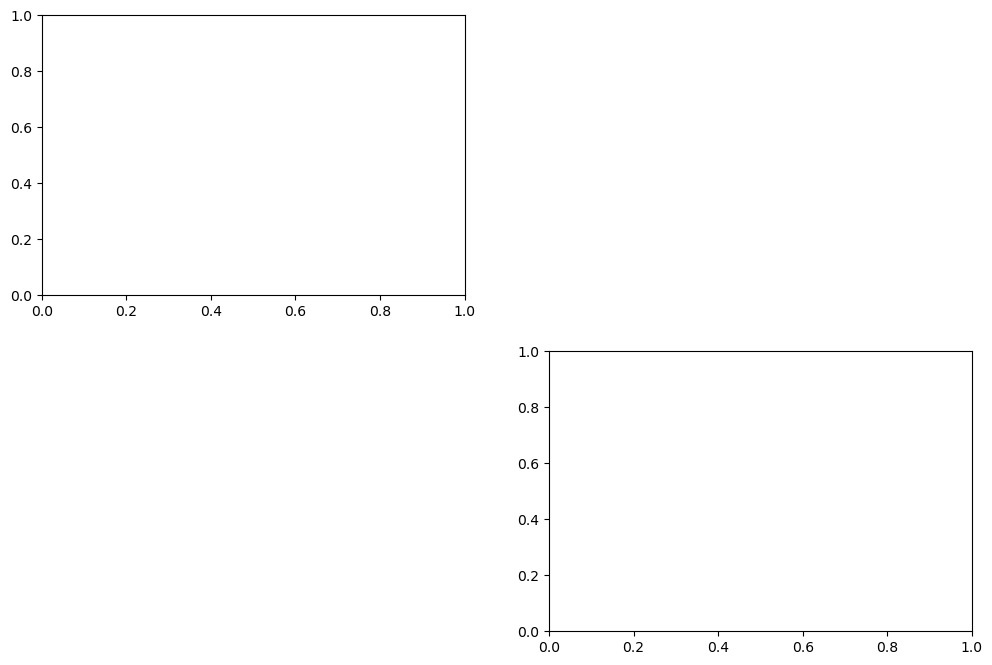

In [ ]:
# 然而这种方法可能缺乏灵活性，我们的子图将严格的按照网格排列，但其实我们可以更灵活的添加子图
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(224)
'''
这里其实非常神奇，我们把子图创建在了figure的左上角和右下角，那么为什么会这样子呢？关键原因在于221，224
这两个数字，这两个数字指定了我们添加子图的位置，那么它们是怎么表达出子图的位置信息的呢？
这三个数字每个数字都有不同的意义，前两个数字，代表布局模式，22代表我将在两行两列的布局中添加子图，也就是在一个2x2的网格中添加子图。
后边的数字，则代表该子图在这个网格中的位置，1代表第一个位置，2代表第二个，由此类推。这里采用单一的index来表示子图位置，
而不是使用行和列的索引，这样可以更简洁的表达子图。所以我们刚刚使用了221和224，就是希望在figure的2x2网络中的第一个和
第四个位置添加子图
'''

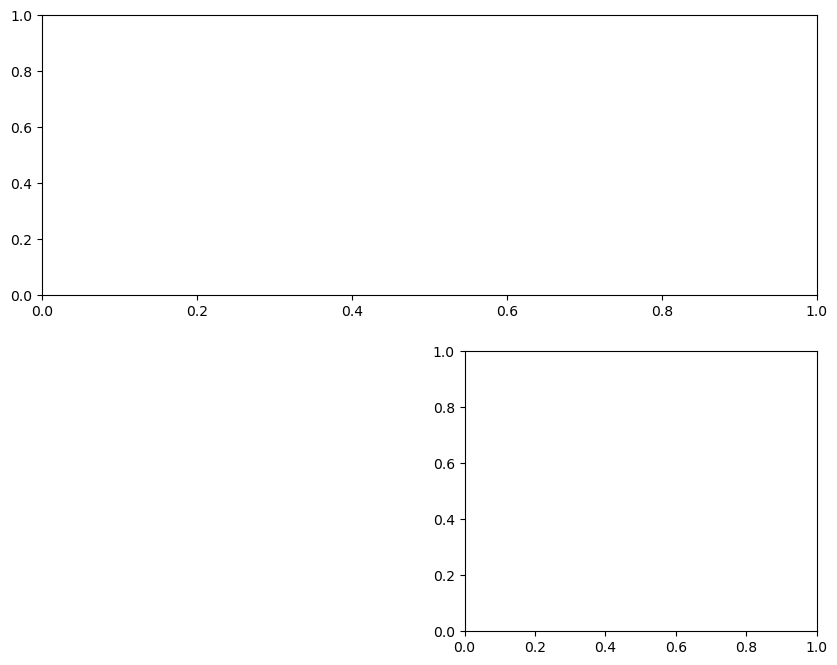

In [32]:
# 这里展示一些更灵活的应用
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(224)
ax2 = fig.add_subplot(211)

### Axes
接下来探索一些边角料，如何管控axe的坐标轴、图例、图形、标题等

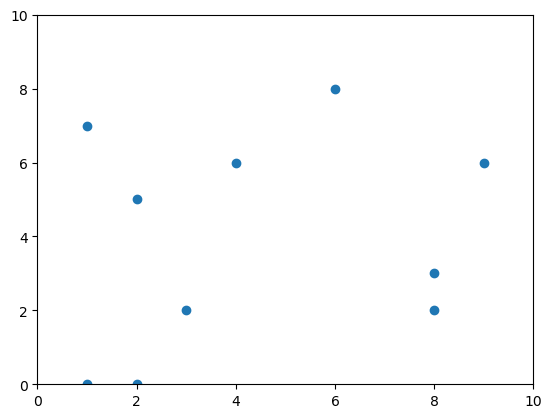

In [ ]:
# 准备假数据
x = np.random.randint(0, 10, 10)
y = np.random.randint(0, 10, 10)
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xbound(0, 10)  # 设置x轴范围
ax.set_ybound(0, 10)  # 设置y轴范围
# 相比set_xlim()和set_ylim()，set_xbound()和set_ybound()更灵活，因为它们允许一些智能调整，
# 例如如果数据超出范围，图形会自动调整以适应数据。
# 但xlim和ylim将提出更严格的限制

Text(0, 0.5, 'Y Axis')

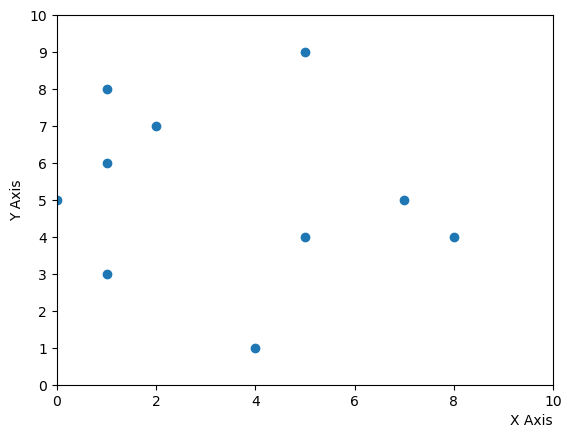

In [ ]:
# 准备假数据
x = np.random.randint(0, 10, 10)
y = np.random.randint(0, 10, 10)
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xbound(0, 10)  # 设置x轴范围
ax.set_ybound(0, 10)  # 设置y轴范围
# 相比set_xlim()和set_ylim()，set_xbound()和set_ybound()更灵活，因为它们允许一些智能调整，
# 例如如果数据超出范围，图形会自动调整以适应数据。
# 但xlim和ylim将提出更严格的限制
############################################################
# 接下来是设置刻度
ax.set_xticks([0, 2, 4, 6, 8, 10])  # 设置x轴刻度
ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # 设置y轴刻度
# 这样我们就可以自定义的设置刻度了（当然这里也可以使用matplotlib.ticker中的MultipleLocator进行控制）

# 进一步可以设置单位
ax.set_xlabel('X Axis',loc='right')  # 设置x轴标签，这个放在右边
ax.set_ylabel('Y Axis')  # 设置y轴标签


[Text(0, 0, 'c'),
 Text(2, 0, 'x'),
 Text(4, 0, 'k'),
 Text(6, 0, 'r'),
 Text(8, 0, 'a'),
 Text(10, 0, 'p')]

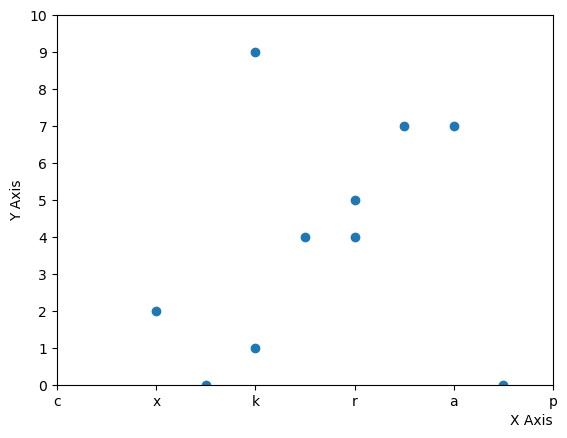

In [ ]:
# 准备假数据
x = np.random.randint(0, 10, 10)
y = np.random.randint(0, 10, 10)
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xbound(0, 10)  # 设置x轴范围
ax.set_ybound(0, 10)  # 设置y轴范围
# 相比set_xlim()和set_ylim()，set_xbound()和set_ybound()更灵活，因为它们允许一些智能调整，
# 例如如果数据超出范围，图形会自动调整以适应数据。
# 但xlim和ylim将提出更严格的限制
############################################################
# 接下来是设置刻度
ax.set_xticks([0, 2, 4, 6, 8, 10])  # 设置x轴刻度
ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # 设置y轴刻度
# 这样我们就可以自定义的设置刻度了（当然这里也可以使用matplotlib.ticker中的MultipleLocator进行控制）

# 进一步可以设置单位
ax.set_xlabel('X Axis',loc='right')  # 设置x轴标签，这个放在右边
ax.set_ylabel('Y Axis')  # 设置y轴标签
#########################################################
# 这里我们可以进行一些可有趣的尝试，我们仅仅是从数值上决定了在哪里，我们的子图
# 需要打刻度，但我们并没有设置刻度的标签，那么matplotlib会自动生成刻度标签，
# 但如果我们想要自定义刻度标签呢？我们可以使用set_xticklabels()和set_yticklabels()方法
ax.set_xticklabels(['c','x','k','r','a','p']) # 当然label的数量必须和打刻度的数量一致

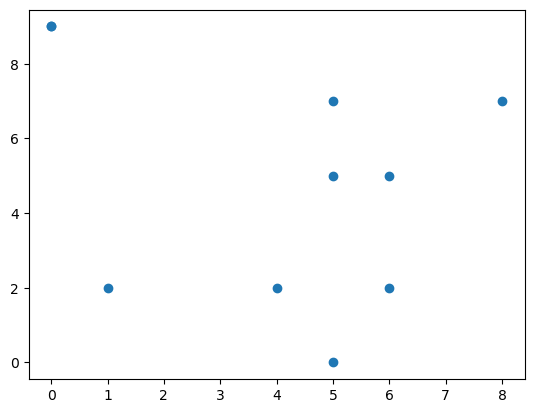

In [63]:
# 准备假数据
x = np.random.randint(0, 10, 10)
y = np.random.randint(0, 10, 10)
fig, ax = plt.subplots()
ax.scatter(x, y)
# 但有的时候我们并不想直接定义图形的范围，我们希望它能够自行调整
ax.set_xbound(lower=None, upper=None)  # 设置x轴范围为自动调整
ax.set_ybound(lower=None, upper=None)  # 设置y轴范围为自动调整
plt.show()


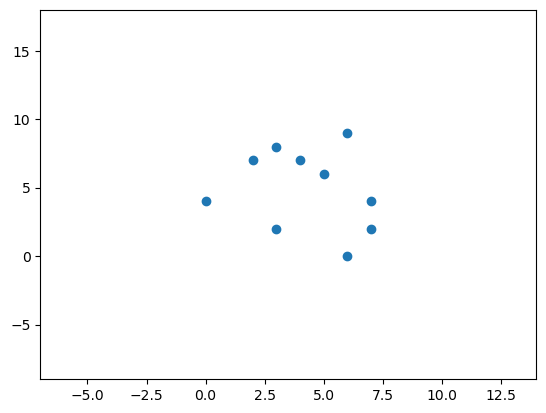

In [66]:
# 准备假数据
x = np.random.randint(0, 10, 10)
y = np.random.randint(0, 10, 10)
fig, ax = plt.subplots()
ax.scatter(x, y)
# 但有的时候我们并不想直接定义图形的范围，我们希望它能够自行调整
ax.set_xbound(lower=None, upper=None)  # 设置x轴范围为自动调整
ax.set_ybound(lower=None, upper=None)  # 设置y轴范围为自动调整
##########################################################
# 我们也可以进一步干预，调整图形边缘为数据边界留出的空白范围
ax.margins(1,1) # 左右各加了 100%的padding，我设置的夸张一些以便看出区别

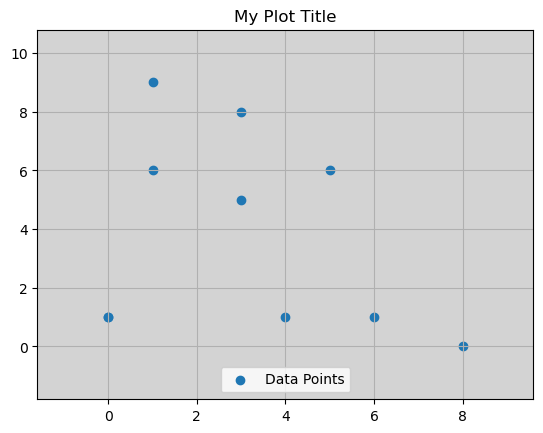

In [ ]:
# 准备假数据
x = np.random.randint(0, 10, 10)
y = np.random.randint(0, 10, 10)
fig, ax = plt.subplots()
ax.scatter(x, y)
# 但有的时候我们并不想直接定义图形的范围，我们希望它能够自行调整
ax.set_xbound(lower=None, upper=None)  # 设置x轴范围为自动调整
ax.set_ybound(lower=None, upper=None)  # 设置y轴范围为自动调整
##########################################################
# 我们也可以进一步干预，调整图形边缘为数据边界留出的空白范围
ax.margins(0.2) # 左右各加了 100%的padding，我设置的夸张一些以便看出区别
#########################################################
ax.set_title('My Plot Title')  # 设置图形标题
ax.grid(True)  # 添加网格
ax.legend(['Data Points'],loc='lower center')  # 添加图例
ax.set_facecolor('lightgrey') # 设置图形背景颜色
# 展示了一些其它方法

### Figure
Figure是包含所有axe的容器对象，更多管控一些全局的属性和方法

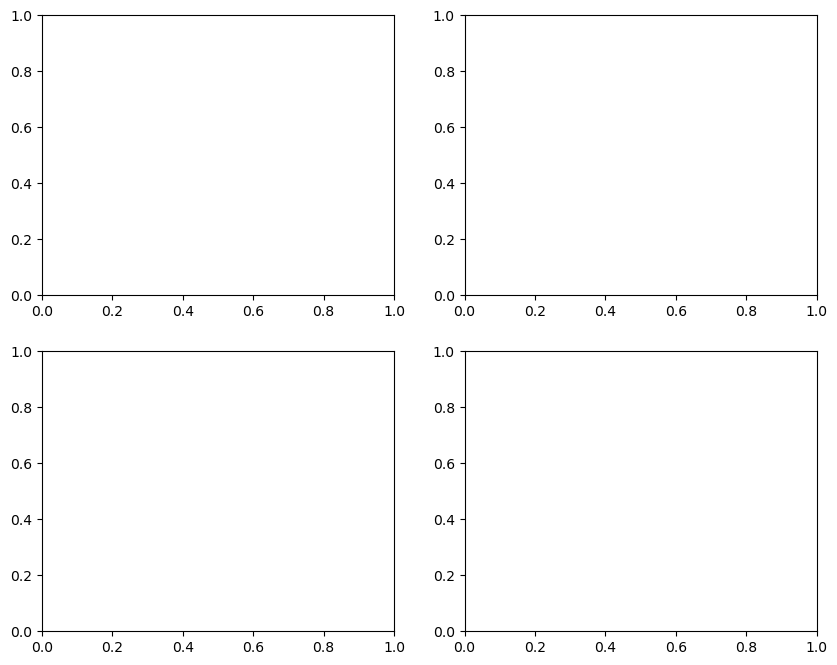

In [3]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))


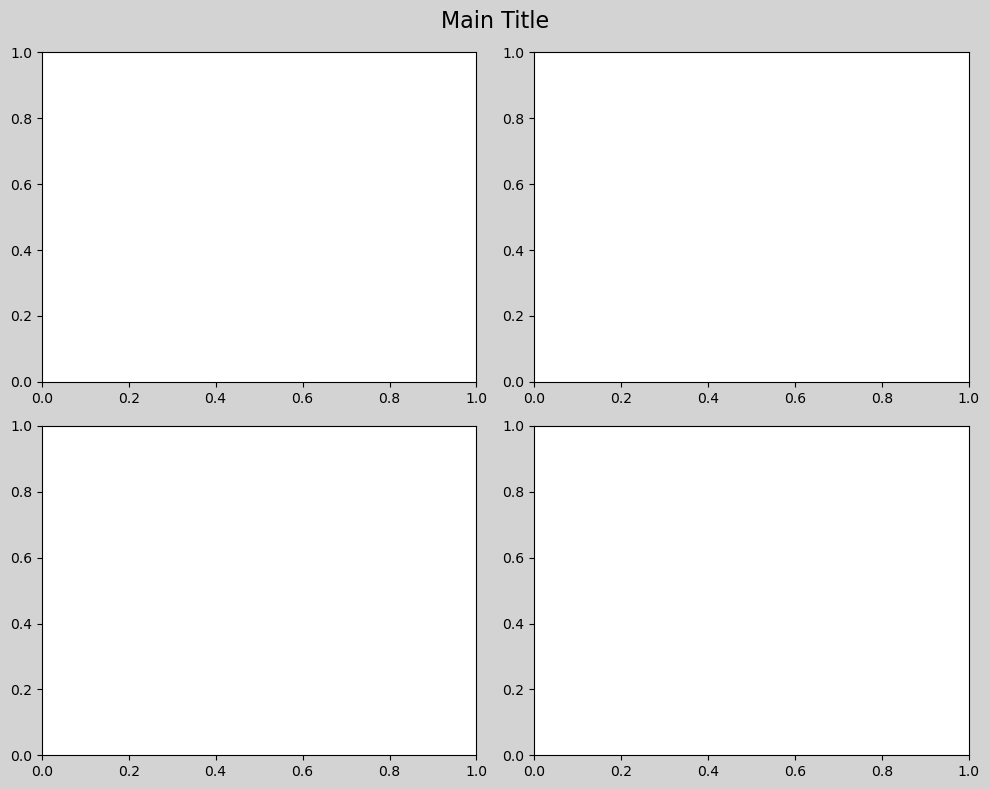

In [7]:
# 加入更多的方法
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Main Title', fontsize=16)  # 设置主标题
fig.tight_layout()  # 自动调整子图布局
fig.set_facecolor('lightgrey')  # 设置整个图形的背景颜色
fig.savefig('my_plot.png')  # 保存图形为PNG文件
fig.savefig('my_plot.pdf')  # 保存图形为PDF文件

### Draw
接下来我们开始研究画图本身

C:\Users\w1369\AppData\Local\Temp\ipykernel_29532\1968813939.py:151: UserWarning: Glyph 26497 (\N{CJK UNIFIED IDEOGRAPH-6781}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\w1369\AppData\Local\Temp\ipykernel_29532\1968813939.py:151: UserWarning: Glyph 22352 (\N{CJK UNIFIED IDEOGRAPH-5750}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\w1369\AppData\Local\Temp\ipykernel_29532\1968813939.py:151: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\w1369\AppData\Local\Temp\ipykernel_29532\1968813939.py:151: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\w1369\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\w1369\anaconda3\Lib\site-packages\IPython\core\pylabto

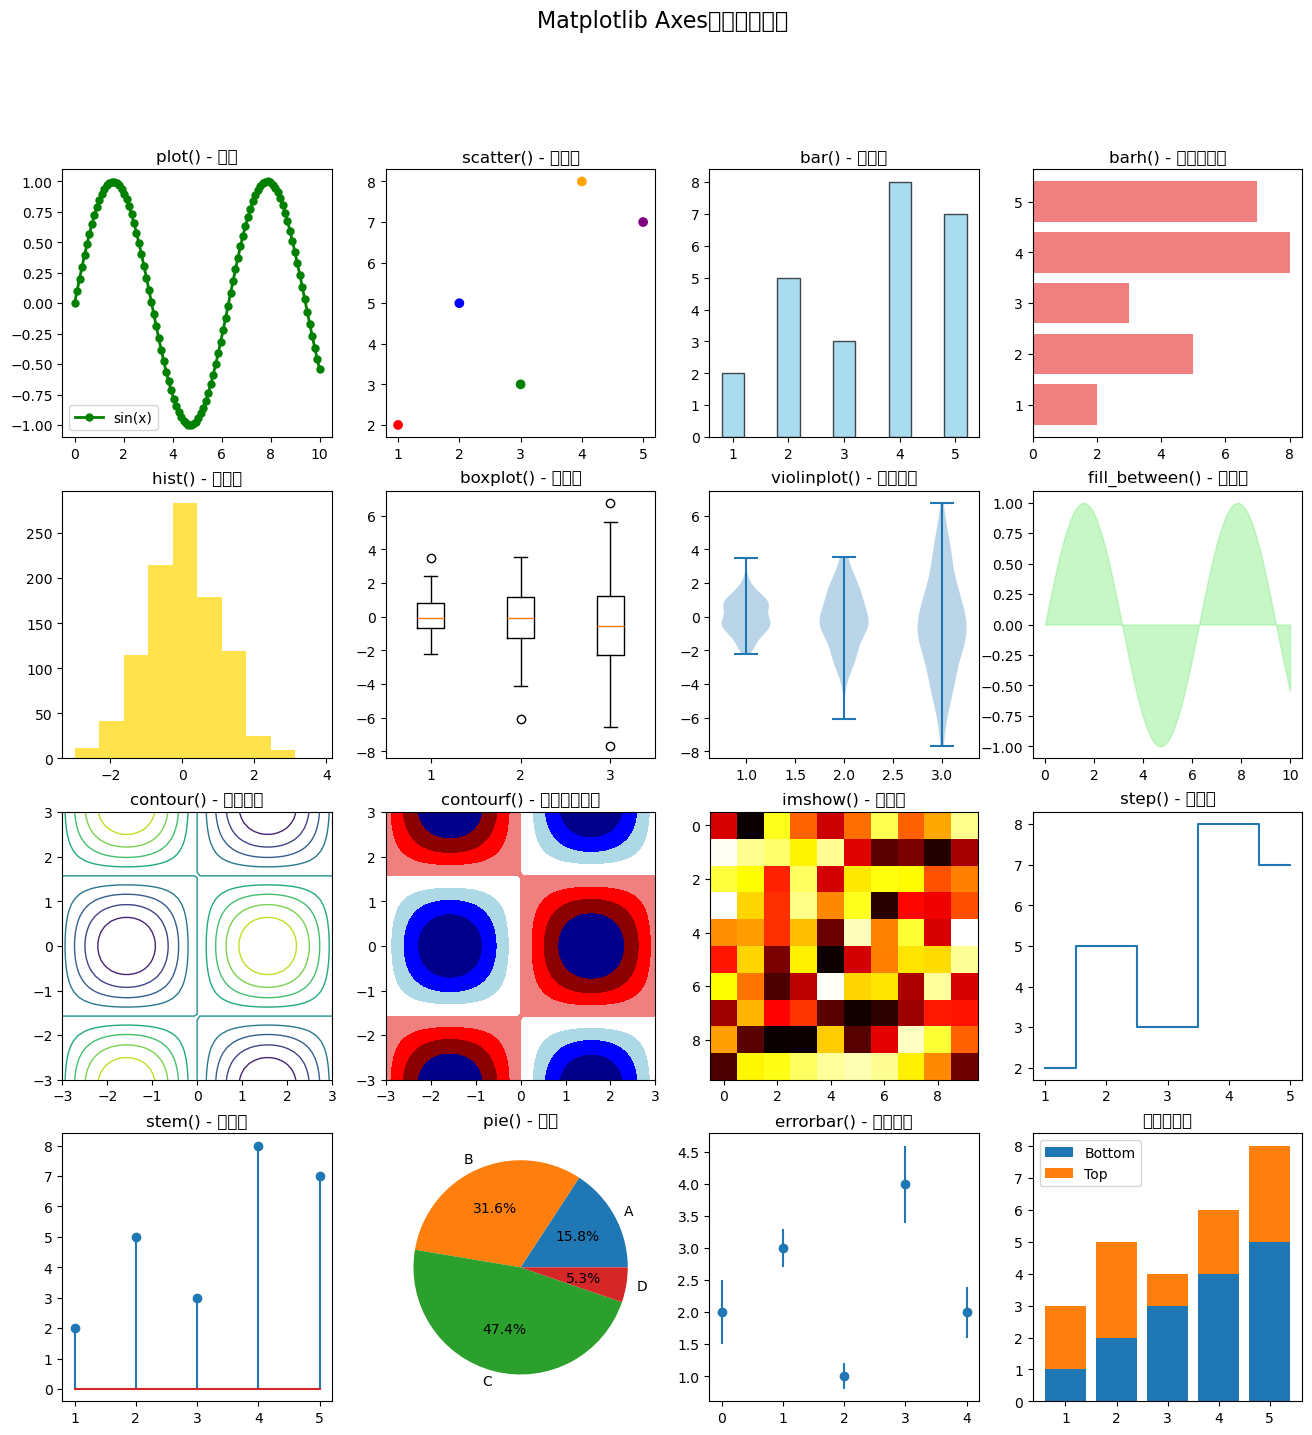

c:\Users\w1369\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26497 (\N{CJK UNIFIED IDEOGRAPH-6781}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\w1369\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22352 (\N{CJK UNIFIED IDEOGRAPH-5750}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\w1369\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


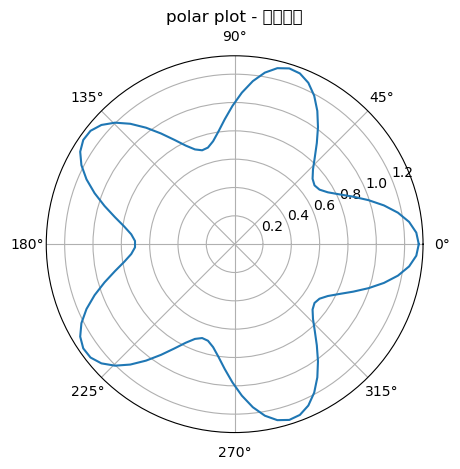

In [ ]:
# 准备示例数据
x = np.linspace(0, 10, 100)
y = np.sin(x)
x_discrete = np.arange(1, 6)
y_discrete = [2, 5, 3, 8, 7]

fig, axes = plt.subplots(4, 4, figsize=(16, 16))
fig.suptitle('Matplotlib Axes绘图方法大全', fontsize=16) 
# 懒得整中文语言包了，汉字显示不出来

# 1. 基础线图
axes[0,0].plot(x, y, label='sin(x)', color='green', marker='o', linestyle='-', linewidth=2, markersize=5)
# label参数用于配合legend图例进行展示，因为我们在一个ax上可以进行多次绘制
axes[0,0].set_title('plot() - 线图')
axes[0,0].legend()
# 这种图形绘制y数据随x数据的折线变化
# 我们可以使用color、marker、linestyle等参数来定制线条的样式
# marker用于标注数据点

# 2. 散点图
axes[0,1].scatter(x_discrete, y_discrete, c=['red', 'blue', 'green', 'orange', 'purple'])
axes[0,1].set_title('scatter() - 散点图')
# 散点图通过c指定点的颜色，通过s指定点的大小，比较有意思的是，我们的c，s两个参数，我们可以只输入
# 一个值，让所有的点都有相同的颜色和大小。但我们也可以输入和数据点数量相同的列表，让每个点都有不同的颜色和大小
# 更进一步的，我们可以让s变成关于数据的表达式，让点的大小会受到点的位置而改变。
# 我们也可以把点的数值赋给c，通过cmap将数值映射给颜色
# 这里过会会进行进一步的展示


# 3. 柱状图
axes[0,2].bar(x_discrete, y_discrete, color='skyblue', width=0.4, edgecolor='black', alpha=0.7)
axes[0,2].set_title('bar() - 柱状图')
# 可以通过color、width、edgecolor等参数来定制柱状图的样式

# 4. 水平柱状图
axes[0,3].barh(x_discrete, y_discrete, color='lightcoral')
axes[0,3].set_title('barh() - 水平柱状图')
# 和柱状图差不多，换了个方向

# 5. 直方图
data = np.random.normal(0, 1, 1000)
axes[1,0].hist(data, bins=10, alpha=0.7, color='gold')
axes[1,0].set_title('hist() - 直方图')
# 注意，从这里开始，它和前边的四张图的绘制有所不同，前者接收的是二维的数据点，
# 而这里接受的是只有一个特征维度的点（一维的点）
# 这里用于反应数据的分布情况，通常用于展示数据的频率分布
# bins用于反应分箱数，即绘图中在x轴上分成多少个区间，这里我们设置为10，所以在图中
# 能看到十个柱

# 6. 箱线图
data_box = [np.random.normal(0, std, 100) for std in range(1, 4)]
axes[1,1].boxplot(data_box)
axes[1,1].set_title('boxplot() - 箱线图')
# 箱型图绘制的其实是数据的五数概括，反应数据的分布特征
# 即最小值，25%分位数，中位数，75%分位数和最大值
# 这里我们创建了方差不同的三组数据分布，然后都用boxplot绘制出来了

# 7. 小提琴图
axes[1,2].violinplot(data_box)
axes[1,2].set_title('violinplot() - 小提琴图')
# 小提琴图反应的则是数据的密度分布特征

# 8. 填充图
axes[1,3].fill_between(x, y, alpha=0.5, color='lightgreen')
axes[1,3].set_title('fill_between() - 填充图')
# 填充图用于填充两条曲线之间的区域，通常用于展示数据的范围或不确定性
# 以上是默认情况，填充了曲线和x轴之间的区域
'''
y1 = np.sin(x)
y2 = np.cos(x)

axes[0,1].plot(x, y1, 'b-', linewidth=2, label='sin(x)')
axes[0,1].plot(x, y2, 'r-', linewidth=2, label='cos(x)')
axes[0,1].fill_between(x, y1, y2, alpha=0.3, color='green')
axes[0,1].set_title('填充两条曲线之间')
axes[0,1].legend()
'''
# 这里是填充两条曲线之间区域的code

# 9. 等高线图
X, Y = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
Z = np.sin(X) * np.cos(Y)
axes[2,0].contour(X, Y, Z, cmap='viridis', linewidths=1,levels=10)
axes[2,0].set_title('contour() - 等高线图')
# 这里和前边的绘图也不太相同了，这里数据有了三个维度的特征，是三维的数据点了
''' 
specific_levels = [-0.8, -0.4, 0, 0.4, 0.8]
axes[1,1].contour(X, Y, Z, levels=specific_levels, 
                        colors=['red', 'orange', 'black', 'green', 'blue'],
                        linewidths=[1, 2, 3, 2, 1])
axes[1,1].set_title('指定特定值和颜色')
axes[1,1].clabel(cs5, inline=True, fontsize=8)
'''
# 但我们依然可以使用列表强制的自定义，选择特定的等高线值和颜色，线宽
# levels如果填入单个数值，则表示等高线的数量
# 如果填入列表，则表示等高线的具体值

# 10. 填充等高线图
colors_custom = ['darkblue', 'blue', 'lightblue', 'white', 
                 'lightcoral', 'red', 'darkred']
axes[2,1].contourf(X, Y, Z, levels=7, colors=colors_custom)
axes[2,1].set_title('contourf() - 填充等高线图')
# 可以指定一个cmap方式，也可以指定levels参数（有多少等高线数量）和colors列表来指定
# 每片区域的颜色
# 注意，cmap和colors不可以同时使用


# 11. 热力图
data_heatmap = np.random.rand(10, 10) # 生成一个10x10的随机数据矩阵
im = axes[2,2].imshow(data_heatmap, cmap='hot')
axes[2,2].set_title('imshow() - 热力图')

# 12. 阶梯图
axes[2,3].step(x_discrete, y_discrete, where='mid')
axes[2,3].set_title('step() - 阶梯图')
# 这里就是连起来了

# 13. 茎叶图
axes[3,0].stem(x_discrete, y_discrete)
axes[3,0].set_title('stem() - 茎叶图')
# 和柱状图那些并无本质区别，只是绘制方式改变了

# 14. 饼图
sizes = [15, 30, 45, 10] 
# 注意：这里的和前边的柱状图不同，饼图的大小是相对的，这里对于size的和是多少并没有要求
axes[3,1].pie(sizes, labels=['A', 'B', 'C', 'D'], autopct='%1.1f%%')
axes[3,1].set_title('pie() - 饼图')

# 15. 误差条图
x_err = np.arange(5)
y_err = [2, 3, 1, 4, 2]
yerr = [0.5, 0.3, 0.2, 0.6, 0.4]
axes[3,2].errorbar(x_err, y_err, yerr=yerr, fmt='o')
axes[3,2].set_title('errorbar() - 误差条图')
# 误差条图用于展示数据点的误差范围
# 这里我们可以使用fmt参数来指定点的样式，yerr参数来指定误差条的长度，注意yerr是单边
# 误差条，如果需要双边误差条，可以使用yerr参数传入一个形如[(lower1, upper1), (lower2, upper2), ...]的列表

# 16. 堆叠柱状图
bottom_values = [1, 2, 3, 4, 5]
top_values = [2, 3, 1, 2, 3]
axes[3,3].bar(x_discrete, bottom_values, label='Bottom')
axes[3,3].bar(x_discrete, top_values, bottom=bottom_values, label='Top')
axes[3,3].set_title('堆叠柱状图')
axes[3,3].legend()

# 17. 极坐标图
theta = np.linspace(0, 2*np.pi, 100)
r = 1 + 0.3*np.cos(5*theta)
# 注意：极坐标需要特殊的projection
fig2, ax_polar = plt.subplots(subplot_kw=dict(projection='polar'))
ax_polar.plot(theta, r)
ax_polar.set_title('polar plot - 极坐标图')
# 这个可以绘制心形线！

plt.tight_layout()
plt.show()

matplotlib还有很多高级图的绘制方法，笔者能力有限，就探索到这。